                                              # Polynomial Linear Regression

# polinom ?

# Polinomlar çok terimli fonksiyonlardır.

# polynomial ?

# Polynomials are polynomial functions.

In [3]:
# Genel formülü : a + b1x + b2x^2 + b3x^3+ ....... + bN*x^N

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures




# veri setimizi pandas yardımıyla alıp dataframe nesnemiz olan df'in içine aktarıyoruz.
# We take our data set with the help of pandas and transfer it into our dataframe object, df.

df = pd.read_csv("polynomial.csv", sep = ";")



# Bir adet polynomial regression nesnesi oluşturması için poLynomialFeatures fonksiyonunu çağırıyoruz.
# Bu fonksiyonu çağırırken polinomun derecesini (N) belirtiyoruz.

# We call the poLynomialFeatures function to create a polynomial regression object.
# When calling this function, we specify the degree (N) of the polynomial.

polynomial_regression = PolynomialFeatures(degree = 2)   # degree = N  bakınız. yukarıdaki polinom fonksiyonudur.

In [17]:
# şimdi veri setimizi görelim. 
# now let's see our dataset.

df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


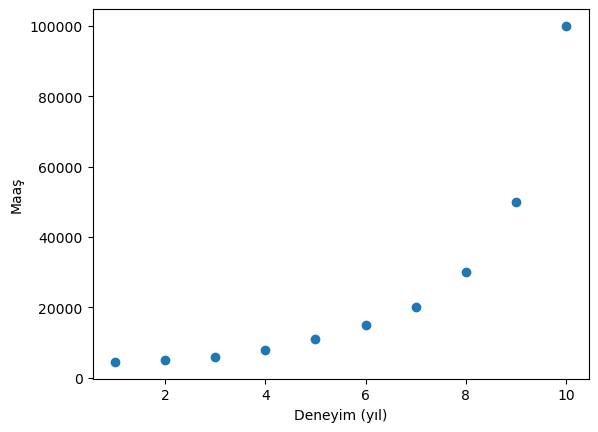

In [20]:
# Çizdirerek bakalım.
# Let's look at it by drawing it.



plt.scatter(df["deneyim"], df["maas"])
plt.xlabel("Deneyim (yıl)")
plt.ylabel("Maaş")
plt.savefig("1.png", dpi=300)
plt.show()

In [22]:
# Görüldüğü gibi doğrusal olarak dağılmıyor veriler.
# Eğer biz bu veri setine Linear Regression uygularsak hiç uygun olmayan bir tahmşn çizelgesi çıkar. 

# As you can see, the data is not distributed linearly.
# If we apply Linear Regression to this data set, an inappropriate prediction chart will appear.

reg = LinearRegression()                  # LinearRegression nesnesini oluşturun
reg.fit(df[["deneyim"]],df["maas"])       # Modeli verilerle eğitin   

plt.xlabel("Deneyim (yıl)")               #Grafik oluşturun
plt.ylabel("Maaş")

plt.scatter(df["deneyim"], df["maas"])


xekseni = df["deneyim"]
yekseni = reg.predict(df[["deneyim"]])
plt.plot(xekseni, yekseni, color = "Green", label = "linear regression")
plt.legend()
plt.show


# Tahmin için çok köt bir doğru, demek ki neymiş: Bir veri için lineer regresyon oluşturmaak uygun değilmiş. Unutmayın veri setinize göre veri modeli seçeceksiniz. Öncelikle veri setinize çok iyi hakim olmalı ve bilmelisiniz.

# A very bad truth for prediction, so what it is: It is not appropriate to create a linear regression for a data. Remember, you will choose the data model according to your data set. First of all, you should have a very good command of your data set.

# Bu veri seti için regression çeşitlerin polynomial regression uygulanması gerektiğine karar verdik. Şimdi nasıl uyguladığımıza bakalım:

# We decided that polynomial regression should be applied to regression types for this data set. Now let's see how we implement it:

In [41]:
polynomisal_regression = PolynomialFeatures(degree = 2)     #Regresyonu 2. seviye verdik.

x_polynomial = polynomial_regression.fit_transform(df[["deneyim"]])

# Regression model nesnemizi olan reg nesnemizi oluşturup bunun fit metodu çağırarak x_polynomial ve y eksenlerini fit ediyor yani regression modelimizi mevcut gerçek verilerle eğitiyoruz.

# We create our reg object, which is our regression model object, and call its fit method to fit the x_polynomial and y axes, that is, we train our regression model with existing real data.




In [44]:
reg = LinearRegression()
reg.fit(x_polynomial,df["maas"])

LinearRegression()

# Artık modelimiz hazır ve eğitilmiş, şimdi eldeki verilere göre modelimiz nasıl sonuç grafiği oluşturuyor onu görelim:

# Now that our model is ready and trained, let's see how our model creates a result graph based on the data available:

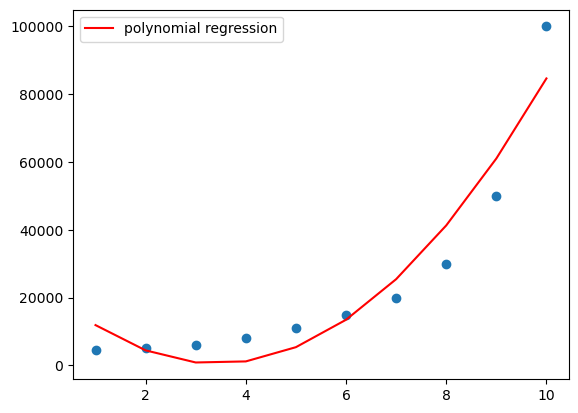

In [54]:
y_head =reg.predict(x_polynomial)
plt.plot(df["deneyim"], y_head,color = "red", label = "polynomial regression")

# plt.plot(xekseni, yekseni, color = "green", label = "Linear regresion")

plt.legend()

# Veri setimizi de nokta olarak scatter edelim de görelim bakalım uymuş mu polynomial regressiom:

# Let's scatter our data set as points and see if it fits my polynomial regression:

plt.scatter(df["deneyim"], df["maas"])

plt.show()



# Gördüğünüz gibi kesinlikle uymuş diyebiliriz, polynomial regression doğru bir seçim. 

# Polinomial lineer regresyon, lineer regresyonun bir genişlemesidir. İki yaklaşım arasındaki temel farklar şunlardır:

# Model Yapısı:

# Lineer Regresyon: Bağımlı değişken ile bağımsız değişken arasında doğrudan ve doğrusal bir ilişki kurar.

# Polinomial Regresyon: Bağımlı değişken ile bağımsız değişken arasında doğrusal olmayan, yani polinomial bir ilişki kurar.



# Veri Uyumu:

# Lineer Regresyon: Verilere doğrusal bir düzlem uydurur. Bu, verilerin lineer bir eğilim göstermesi durumunda iyidir.

# Polinomial Regresyon: Verilere daha karmaşık eğriler uydurabilir, bu da daha iyi uyum sağlayabilir, özellikle verilerde doğrusal olmayan bir ilişki varsa.



# Karmaşıklık:

# Lineer Regresyon: Genellikle daha basit ve hızlıdır. Model parametreleri daha azdır ve hesaplama açısından daha az karmaşıktır.

# Polinomial Regresyon: Daha karmaşıktır çünkü daha fazla parametre (polinom derecesine bağlı olarak) içerir. Bu, modelin daha fazla hesaplama gücü gerektirmesine neden olabilir.

# Aşırı Uydurma (Overfitting):

# Lineer Regresyon: Aşırı uydurma riski daha düşüktür çünkü model daha basittir.

# Polinomial Regresyon: Polinom derecesi arttıkça, aşırı uydurma riski artar çünkü model veriye çok iyi uyabilir ama yeni verilerde kötü performans gösterebilir.

# Uygulama Alanları:

# Lineer Regresyon: Basit ve genellikle doğrudan ilişkilerin olduğu durumlar için uygundur.

# Polinomial Regresyon: Daha karmaşık ilişkiler ve eğilimler içeren durumlarda kullanılır, özellikle verilerde eğriler veya düzensizlikler varsa.

# Özetle, polinomial regresyon, lineer regresyonun bir genellemesidir ve daha esnek bir modelleme imkanı sunar, ancak daha karmaşık ve aşırı uydurma riski taşır.



# Polynomial linear regression is an expansion of linear regression. The main differences between the two approaches are:

# Model Structure:

# Linear Regression: Establishes a direct and linear relationship between the dependent variable and the independent variable.

# Polynomial Regression: It establishes a non-linear, that is, polynomial relationship between the dependent variable and the independent variable.



# Data Compatibility:

# Linear Regression: Fits a linear plane to the data. This is good if the data shows a linear trend.

# Polynomial Regression: Can fit more complex curves to the data, resulting in better fit, especially if there is a non-linear relationship in the data.



# Complexity:

# Linear Regression: Generally simpler and faster. The model has fewer parameters and is less computationally complex.

# Polynomial Regression: It is more complex because it involves more parameters (depending on the degree of polynomial). This may cause the model to require more computing power.

# Overfitting:

# Linear Regression: The risk of overfitting is lower because the model is simpler.

# Polynomial Regression: As the degree of polynomial increases, the risk of overfitting increases because the model may fit the data very well but perform poorly on new data.

# Scope of application:

# Linear Regression: Suitable for cases where there are simple and generally direct relationships.

# Polynomial Regression: Used in situations involving more complex relationships and trends, especially if there are curves or irregularities in the data.

# In summary, polynomial regression is a generalization of linear regression and offers more flexible modeling, but is more complex and carries the risk of overfitting.
 
